import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

#Fixing a random seed
import random
random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#输出数据集大小
print ('原始数据集特征：',X.shape, 
       '训练数据集特征：',X_train.shape ,
      '测试数据集特征：',X_test.shape)

print ('原始数据集标签：',y.shape, 
       '训练数据集标签：',y_train.shape ,
       '测试数据集标签：',y_test.shape)



In [2]:
print(X)

[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.6]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2.8]

19
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.40      0.44      0.42         9
           2       0.55      0.55      0.55        11

   micro avg       0.63      0.63      0.63        30
   macro avg       0.65      0.63      0.64        30
weighted avg       0.65      0.63      0.64        30

[[9 1 0]
 [0 4 5]
 [0 5 6]]


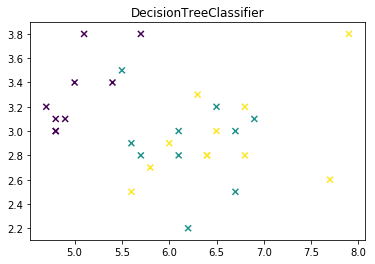

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Define the model (with default hyperparameters)
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

print(sum(test_predictions == y_test)) #预测结果与真实结果比对
print(metrics.classification_report(y_test,test_predictions))
print(metrics.confusion_matrix(y_test,test_predictions))

L1 = [n[0] for n in X_test]
L2 = [n[1] for n in X_test]
plt.scatter(L1,L2, c=test_predictions,marker='x')
plt.title('DecisionTreeClassifier')
plt.show()



In [19]:
import numpy as np

from sklearn.datasets import load_digits

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 生成数据
digits = load_digits()
X, y = digits.data, digits.target

# 元分类器
meta_clf = RandomForestClassifier(n_estimators=20)

# =================================================================
# 设置参数
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# 运行随机搜索 RandomizedSearch
n_iter_search = 20
rs_clf = RandomizedSearchCV(meta_clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
rs_clf.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
print(rs_clf.grid_scores_)

# =================================================================
# 设置参数
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# 运行网格搜索 GridSearch
gs_clf = GridSearchCV(meta_clf, param_grid=param_grid)
start = time()
gs_clf.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gs_clf.grid_scores_)))
print(gs_clf.grid_scores_)



NameError: name 'sp_randint' is not defined

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

#Fixing a random seed
import random
random.seed(42)

原始数据集特征： (150, 4) 训练数据集特征： (120, 4) 测试数据集特征： (30, 4)
原始数据集标签： (150,) 训练数据集标签： (120,) 测试数据集标签： (30,)
30
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


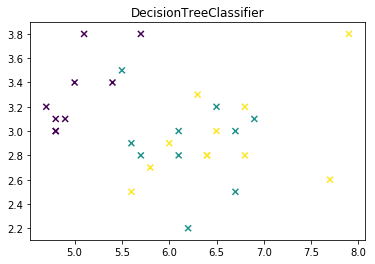

In [17]:




#输出数据集大小
print ('原始数据集特征：',X.shape, 
       '训练数据集特征：',X_train.shape ,
      '测试数据集特征：',X_test.shape)

print ('原始数据集标签：',y.shape, 
       '训练数据集标签：',y_train.shape ,
       '测试数据集标签：',y_test.shape)

iris = datasets.load_iris()
param_grid = {"base_estimator__criterion": ["gini", "entropy"],
          "base_estimator__splitter":   ["best", "random"],
          "n_estimators": [1, 2]}
dtc = DecisionTreeClassifier(random_state=42)
ada = AdaBoostClassifier(base_estimator=dtc)
iris = datasets.load_iris()
X = iris.data[:]
y = iris.target


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search_ada = GridSearchCV(ada, param_grid=param_grid, cv=10)
grid_fit = grid_search_ada.fit(X, y)

# TODO: Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

print(sum(best_test_predictions == y_test)) #预测结果与真实结果比对
print(metrics.classification_report(y_test,best_test_predictions))
print(metrics.confusion_matrix(y_test,best_test_predictions))

L1 = [n[0] for n in X_test]
L2 = [n[1] for n in X_test]
plt.scatter(L1,L2, c=test_predictions,marker='x')
plt.title('DecisionTreeClassifier')
plt.show()
